# EEG preprocessing 

## Imports

The data will be processed using the mne library. Also there are libraries made in eegyolk in order to load the metadata, eeg data and the event markers. Those libraries need to be imported

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib

import sys
sys.path.insert(0, 'C:\Projects\ePodium\eegyolk') # path to helper functions
from eegyolk import helper_functions as hf # library useful for eeg and erp data cleaning
from eegyolk import initialization_functions #library to import data
from eegyolk import epod_helper

## Load metadata and eeg files

First the different pathways for the different datasets need to be defined. There are three pathways: eeg, metadata and events. The files can be loaded using the initialization_functions library. All event markers needs to be saved in a seperate folder. If not saved already, the event markers will be saved using the initialization_function library. 

In [2]:
# define pathways
path_eeg = os.path.join("F:", os.sep, "Stage", "ePODIUM", "Data", "not_zip")
path_metadata = os.path.join("F:", os.sep, "Stage", "ePODIUM", "Data", "metadata")
path_eventmarkers = os.path.join("F:", os.sep, "Stage", "ePODIUM", "Data", "not_zip", "event_markers")

# load metadata and eeg
files_metadata = ["children.txt", "cdi.txt", "parents.txt", "CODES_overview.txt"]  
children, cdi, parents, codes = initialization_functions.load_metadata(path_metadata, files_metadata) # load metadata
eeg, eeg_filenames, eeg_filepaths = initialization_functions.load_dataset(path_eeg) # load eeg

# load events 
events_files = os.listdir(path_eventmarkers)
if len(events_files) == 0 or path_eventmarkers == False: # check if event markers are saved in a seperate folder
    initialization_functions.save_event_markers(path_eventmarkers, eeg, eeg_filenames) # save event markers
    
event_markers = initialization_functions.load_event_markers(path_eventmarkers, eeg_filenames) # load event markers
event_markers_simplified = epod_helper.group_event_markers(event_markers) # simplify events


99 EEG files loaded
99 Event Marker files loaded


## Data info

Choose which participant you want to view in the box below. 

In [3]:
# create a filter on correct participants 
index = widgets.IntText(
    step=0.1,
    description='Participant',
    disabled=False
)
widgets.VBox([index])

In [4]:
index = int(index.value)

In [5]:
print("\n", eeg[index].info)


 <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-03-01 09:29:57 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


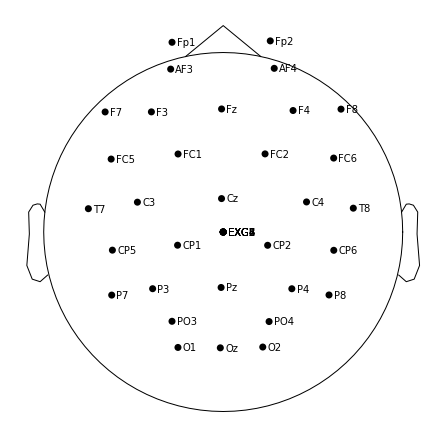

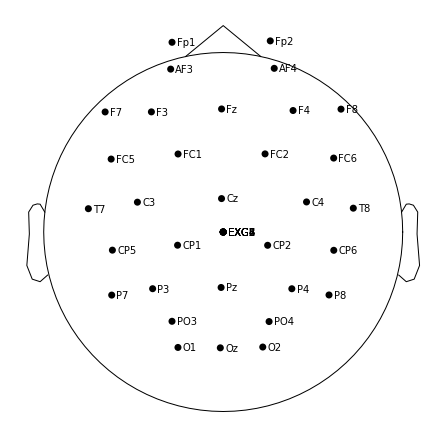

In [6]:
# plot of the used sensors
montage = mne.channels.make_standard_montage('standard_1020')
#montage.plot(kind='topomap', show_names=True)
eeg[index].info.set_montage(montage, on_missing='ignore')
eeg[index].plot_sensors(ch_type='eeg', show_names=True)

Using matplotlib as 2D backend.
Opening raw-browser...


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\nadin\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "C:\Users\nadin\anaconda3\lib\site-packages\matplotlib\backends\_backend_tk.py", line 241, in resize
    self.resize_event()
  File "C:\Users\nadin\anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 1767, in resize_event
    self.callbacks.process(s, event)
  File "C:\Users\nadin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 229, in process
    self.exception_handler(exc)
  File "C:\Users\nadin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 81, in _exception_printer
    raise exc
  File "C:\Users\nadin\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 224, in process
    func(*args, **kwargs)
  File "C:\Users\nadin\anaconda3\lib\site-packages\mne\viz\_mpl_figure.py", line 511, in _resize
    old_width, old_height = self.mne.fig_size_px
AttributeEr

Closing raw-browser...
Channels marked as bad:
none


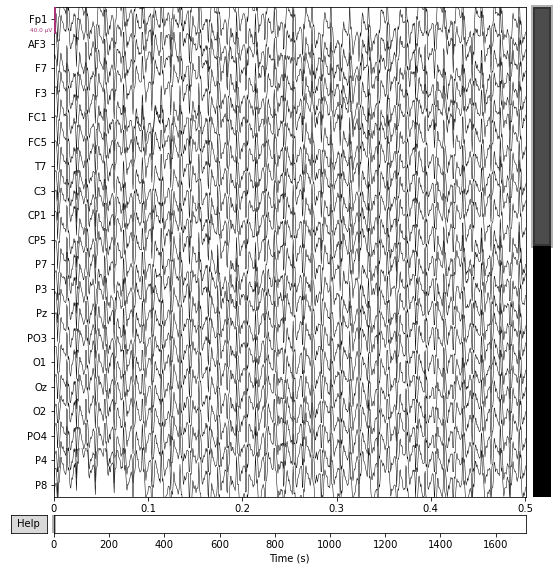

In [7]:
matplotlib.use('TkAgg')  
eeg[index].plot(duration=0.5, block=True)

<ipython-input-8-39cc3f276206>:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(event_markers_simplified[index], event_id = epod_helper.event_dictionary)


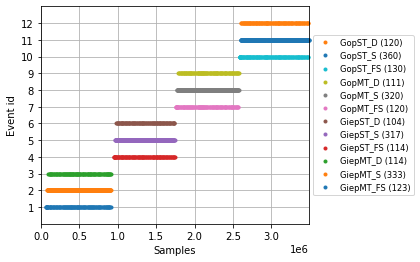

In [8]:
%matplotlib inline 
fig = mne.viz.plot_events(event_markers_simplified[index], event_id = epod_helper.event_dictionary)

## Filtering

In [9]:
# bad channel remover
def removebadchannel(eeg):
    for i in range(len(eeg)):
        if len(eeg[i].info['bads']) != 0:
            eeg[i] = mne.pick_types(eeg[i].info, meg=False, eeg=True, exclude='bads')
    return eeg
removebadchannel(eeg)

[<RawEDF | 101a.bdf, 41 x 3497984 (1708.0 s), ~56 kB, data not loaded>,
 <RawEDF | 101b.bdf, 41 x 3907584 (1908.0 s), ~43 kB, data not loaded>,
 <RawEDF | 102a.bdf, 41 x 3815424 (1863.0 s), ~43 kB, data not loaded>,
 <RawEDF | 102b.bdf, 41 x 3782656 (1847.0 s), ~43 kB, data not loaded>,
 <RawEDF | 103a.bdf, 41 x 3899392 (1904.0 s), ~43 kB, data not loaded>,
 <RawEDF | 103b.bdf, 41 x 4294656 (2097.0 s), ~43 kB, data not loaded>,
 <RawEDF | 104a.bdf, 41 x 3790848 (1851.0 s), ~43 kB, data not loaded>,
 <RawEDF | 104b.bdf, 41 x 3794944 (1853.0 s), ~43 kB, data not loaded>,
 <RawEDF | 105a.bdf, 41 x 4282368 (2091.0 s), ~43 kB, data not loaded>,
 <RawEDF | 105b.bdf, 41 x 3852288 (1881.0 s), ~43 kB, data not loaded>,
 <RawEDF | 106a.bdf, 41 x 3215360 (1570.0 s), ~43 kB, data not loaded>,
 <RawEDF | 106b.bdf, 41 x 3788800 (1850.0 s), ~43 kB, data not loaded>,
 <RawEDF | 107a.bdf, 41 x 4063232 (1984.0 s), ~43 kB, data not loaded>,
 <RawEDF | 107b (deel 1+2).bdf, 41 x 1882112 (919.0 s), ~43 kB, 

In [ ]:
lowpass = widgets.IntText(
    step=0.1,
    description='lowpass:',
    disabled=False
)

highpass = widgets.IntText(
    step=0.1,
    description='highpass:',
    disabled=False
)

widgets.VBox([lowpass,highpass])


In [ ]:
# change type to integer
lowpass = int(lowpass.value)
highpass = int(highpass.value)

Bandpass filter doesn't work due to memory issues. Can be fixed with preload = True in the load_data() in helper_functions.py. However, jupyter crashes due to lack of memory when done. Needs to be fixed.

In [ ]:
# bandpass filter
for index in range(len(eeg)): eeg[index] = hf.band_pass_filter(eeg[index], lowpass, highpass)

Below a working filter, but not imported from helper_functions.py. This is a band pass filter with defined frequency. The filter is useful for limitting the bandwidth of the output signal to avoid noise. 

In [ ]:
# plotting filter
filter_params = mne.filter.create_filter(eeg[index].get_data(), eeg[index].info['sfreq'],
                                         l_freq=lowpass, h_freq=highpass)
mne.viz.plot_filter(filter_params, eeg[index].info['sfreq'], flim=(0.01, 5))

The data contains power line noise which disrupts the rest of the signal. The notch filter filters out the fequency of 50 Hz. Does not work because of the preload memory issue. 

In [ ]:
# create notch filter
freqs = (60, 120, 180, 240)
for i in range(len(eeg)): eeg[i] = eeg[i].notch_filter(freqs=freqs)

## Create evoked responses 

In order to get the evoked responses, the eegs first needs to be devided into epochs and then being averaged for each stimuli type. Epochs are created with joining the eeg data with a specific event. tmin and tmax are the start and stop time relative to each event. mne.Epochs automaticaly create a baseline correction.

In [10]:
def create_epochs(eeg, event_markers_simplified, tmin, tmax):
    epochs =  []
    for i in range(len(eeg)): 
        single_epoch = mne.Epochs(eeg[i], event_markers_simplified[i], tmin=tmin, tmax=tmax)
        epochs.append(single_epoch)
    return epochs

epochs = create_epochs(eeg, event_markers_simplified,-0.3, 0.7)

Not setting metadata
2266 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2389 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2208 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2521 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mod

Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2471 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline

Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


Here we average the epochs for each event. For each event the there is a plot over the 40 channels.  

In [11]:
epochs = hf.create_epochs(eeg, event_markers_simplified,-0.3, 0.7)

Not setting metadata
2266 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2389 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2208 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2521 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mod

Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2471 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline

Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
2440 matching events found
Setting baseline interval to [-0.2998046875, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [12]:
def drop_bad_epoch(epochs, drop_criteria):
    reject_criteria = dict(eeg=drop_criteria)  # 100 µV
    for i in range(len(epochs)):
        epochs[i] = epochs[i].drop_bad(reject=reject_criteria)
    return epochs

epochs = drop_bad_epoch(epochs, 400e-6)

Loading data for 2266 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O1', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['PO3', 'O2', 'PO4

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'F4']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'F4']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based 

    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P3', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2', 'P8']
    Reject

    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'EXG2']


    Rejecting  epoch based on EEG : ['T7', 'PO3', 'Oz', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1'

    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', 'P7']
    Rejecting  epoch based on EEG : ['F3', '

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecti

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'PO4']
    Rejecting  epoch based on EEG : ['F3', 'PO4']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecti

    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
   

    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'Pz', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'P3', 'EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1', 'EXG2']
    Rejecti

    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecti

    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'O2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O2', 'EXG2']
    

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'T8', 'F8', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'P7', 'P3', 'Pz', 'O1', 'O2', 'PO4', 'P4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P7', 'P3', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'Pz', 'O1', 'O2', 'CP2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5',

    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'Oz', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P7', 'Pz', 'O1', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'CP5', 'P7', 'O1', 'O2', 'P8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O2', 'Fp2']
    Rejecting  e

    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'P8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'P8', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  e

    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'P8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'O2', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'Oz', 'O2', 'CP2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'P7', 'P3', 'Pz', 'PO3', 'Oz', 'O2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['FC1', 'P7']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'CP5', 'P7']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O2',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'F

    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'O2', 'EXG1']
    Rejecting

    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'Pz', 'PO3', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7

    Rejecting  epoch based on EEG : ['P7', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'O2', 'PO4', 'CP6', 'FC6', 'F8', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'P7', 'Pz', 'Oz', 'O2', 'PO4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'T7', 'C3', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP2', 'C4', 'T8', 'FC6', 'F

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'P7', 'O1', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'F8', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'P8', 'T8', 'F8', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'CP5', 'P7', 'Pz', 'O1', 'O2', 'PO4', 'P4', 'F8', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'F8', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'Fp2', 'Fz', '

    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'CP5', 'P7', 'O1', 'O2', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1', 'E

    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    

    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'FC5', 'O1', 'O2', 'CP2', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'O2', 'CP2', 'FC2', 'F4', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'Fp2', 'EXG1']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['O2', 'CP2', 'FC2', 'F4', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'O2', 'CP2', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O2', 'CP2', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'O2', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'C3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'O1', 'Oz', 'O2', 'CP2', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC

    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP5', 'Pz', 'O1', 'Oz', 'O2', 'CP6', 'CP2', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Pz', 'O1', 'Oz', 'O2', 'CP2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'Oz', 'O2', 'CP6', 'CP2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'CP2', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'T7', 'CP5', 'Pz', 'Oz', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', '

    Rejecting  epoch based on EEG : ['FC1', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'CP2', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'CP5', 'P7', 'O1', 'O2', 'PO4', 'CP2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'CP2', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'CP2', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'CP2', 'C4', 'FC6', 'FC2', 'F8', 'Cz', 'EXG1']
    Re

    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'CP2', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'CP2', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'CP5', 'O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'Oz', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'P3', 'Oz', 'O2', 'CP2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T7', 'O2', 'CP2', 'F4', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['Pz', 'O2', 'PO4', 'CP2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'O1', 'O2', 'CP2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC1', 'T7', 'CP5', 'Pz', 'PO3', 'O1', 'O2', 'PO4', 'P8', 'CP2', 'FC6', 'F4', 'AF4', 'Fp2', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'T8']
    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'PO4', 'CP2']
    Rejecting  epoch based on EEG : ['CP5', 'O2', 'PO4', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'PO4', 'CP2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'O2', 'PO4', 'P4', 'CP2']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'O2', 'CP2']
    Rejec

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'CP2', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'O1', 'O2', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'O1', 'CP2', 'F8', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P7', 'O1', 'CP2', 'F8', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'Oz', 'CP2', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'O1', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'Oz', 'CP2', 'FC6', 'F8', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'CP2', 'FC6', 'F8', 'Fz']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'CP2', 'Fz']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'C3', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP2', 'T8', 'FC6', 'FC2', 'F8', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4',

    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'PO4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'O2', 'PO4', 'P4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'PO4', 'P4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P4', '

    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'O2', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'PO4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O1', 'O2', 'PO4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EX

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O1', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting 

    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'Oz', 'O2', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O2', 'P4', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'P4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fp1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O2', 'FC6', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O2', 'F

    Rejecting  epoch based on EEG : ['Pz', 'O1', 'Oz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F3', 'O2']
    Rejecting  epoch based on EEG : ['F3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  e

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'Oz', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'Oz', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'T8']
    Rejecting  epoch based on EEG : ['P7', 'T8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based 

    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'T8']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'PO4', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rej

    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'PO4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'Oz', 'O2', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'PO4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'O1', 'Oz', 'O2', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['FC5', 'O2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch 

    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'Cz']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'Cz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'Pz']
    Rejecting  epoch based on EEG : ['P7', 'Pz']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O2', 'PO4', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
1418 bad epoch

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P3', 'PO3', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'T8']
    Rejec

    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'P3', 'PO3', 'FC6', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'P3', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'O2', 'P8', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8',

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'O2', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'EXG2']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'O2', 'PO4', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'CP5', 'P7', 'O1', 'O2', 'PO4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'P7', 'O2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'FC6', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'FC6', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', '

    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'FC6', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'CP1', 'F8']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'O1', 'FC6', 'F4', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'Oz', 'O2', 'FC6', 'AF4', 'Fp2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'Oz', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'Oz', 'O2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'Oz', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'Oz', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Oz', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'Pz', 'O1', 'P8', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'P7', 'Pz', 'O1', 'P8', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'O1', 'FC2', 'AF4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'O1', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch ba

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Reject

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'CP2', 'C4', 'T8', 'FC2', 'F8', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG

    Rejecting  epoch based on EEG : ['O2', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']


    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'T8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4']
    Rejecting  epoch based on EEG : ['AF3', 'AF4']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF3', 'Pz', 'AF4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['F3', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'T8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'O1', 'Oz', 'P4', 'P8', 'FC6', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'P8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Fz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'AF4', 'Fz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'PO4', 'CP6', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'AF4']
    Reject

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Pz', 'O1', 'Oz', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Pz', 'Oz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['F

    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2

    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'P7', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'P8', 'CP6', 'C4', 'T8', 'FC2', 'F4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'PO4', 'CP6', 'C4', 'T8', 'F4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'CP6', 'C4', 'T8', 'FC2', 'F4', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'CP6', 'C4', 'FC2', 'F4', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'O1', 'Oz', 'O2', 'P8', 'CP6', 'C4', 'FC2', 'F4', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'C4', 'AF4', 'Fp2', 'EXG1'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'P3', 'Oz', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'CP6', 'FC2', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'Oz', 'O2', 'PO4', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O1', 'Oz', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'O

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'Pz', 'PO3', 'O1', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC2', 'F4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'PO3', 'O1', 'O2', 'PO4', 'P4', 'CP6', 'CP2', 'T8', 'FC2', 'F4', 'F8', 'Fz', 'EXG1', 'EXG

    Rejecting  epoch based on EEG : ['F3', 'P3', 'Pz', 'PO3', 'P8', 'CP2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'P3', 'Pz', 'PO3', 'P8', 'CP2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'P3', 'Pz', 'P8', 'CP2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'Pz', 'P8', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'Pz', 'PO3', 'O2', 'P8', 'CP2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'Pz', 'PO3', 'PO4', 'P8', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'Pz', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'CP5', 'P3', 'PO3', 'P8', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'CP5', 'P3', 'Pz', 'PO3', 'Oz', 'O2', 'P8', 'CP2', 'T8', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'Pz', 'PO3', 'P8', 'C

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC1', 'FC5', 'CP5', 'P7', 'P3', 'Pz', 'PO4', 'P4', 'CP2', 'AF4', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'FC1', 'CP5', 'P7', 'P3', 'Pz', 'PO4', 'CP2', 'Fz', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'FC1', 'P3', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['AF3', 'FC1', 'P3', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7',

    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['F4', 'AF4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
   

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3

    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['F8', 'Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    R

    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['P7', 'Cz']
    Rejecting  epoch based on EEG : ['P7', 'Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Cz', 'EXG1']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Reject

    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'P7', 'O2', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['P3', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'CP6', 'T8']
    Rejecting  epoch based on EEG : ['O2', 'CP6', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['T7', 'O1']
    Rejecting  epoch based on EEG : ['T7', 'O1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['P7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4'

    Rejecting  epoch based on EEG : ['P7', 'P3', 'O1', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'EXG1', 

    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'P7', 'O1', 'Oz', 'O2', 'P8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7'

    Rejecting  epoch based on EEG : ['O1', 'O2', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['F3', 'CP5', 'P7', 'CP6', 'T8', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG2']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'Pz', 'O1', 'O2', 'PO4', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'P

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F8', '

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Pz', 'O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'AF4', 'Fp2', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'FC6', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'P8', 'CP6', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'Pz', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'O1', 'O2', 'P8', 'CP6', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Pz', 'PO4', 'P8', 'C4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'T7', 'C

    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP1', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'FC6', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Pz', 'PO4', 'P8', 'CP6', 'C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Pz', 'PO4', 'P4', 'CP6', 'C4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Pz', 'PO4', 'P8', 'C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'T7', 'P7', 'O1', 'Oz', '

    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Pz', 'P8', 'CP6', 'C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'PO4', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'Pz', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'P7', 'PO3', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'PO3', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'P8', 'CP6', 'C4', 'T8', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'PO3', 'O2', 'P8', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Pz', 'PO4', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', '

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F8', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'Pz', 'O1', 'PO4', 'P8', 'C4', 'AF4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'Pz', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'Pz', 'PO3', 'O1', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Pz', 'Oz', 'O2', 'CP6', 'C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  e

    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'T7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'T7', 'PO3', 'O1', 'Oz', 'PO4', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['C4', 'Cz']
    Rejecting  epoch based on EEG : ['Oz', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['P8', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'AF4', 'Fp2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Fp2', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Fp2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P

    Rejecting  epoch based on EEG : ['C4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'P8', 'CP6', 'C4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'CP6', 'C4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1

    Rejecting  epoch based on EEG : ['F7', 'CP5', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P8', 'CP6', 'C4', 'F4', 'F8', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'FC5', 'T7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'CP6', 'C4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'PO4', 'P8', 'CP6', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Pz', 'PO4', 'P8', 'CP6', 'C4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'CP6', 'C4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'Cz', 'EXG1', '

    Rejecting  epoch based on EEG : ['F7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Pz', 'Oz', 'O2', 'P8', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'C4', 'FC6', 'Cz']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'P8', 'C4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'PO4', 'P8',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'Pz', 'O1', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['Pz', 'Oz', 'P4', 'P8', 'CP6', 'C4', 'Cz']


    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', '

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'Pz', 'P8', 'CP6', 'C4', 'T8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'Pz', 'P8', 'CP6', 'C4', 'T8', 'F4', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'Pz', 'PO3', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T7', 'Pz', 'PO3', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'Pz', 'PO3', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'C4', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'C4', 'T8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'FC5', 'P7', 'Pz', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'T7', 'Pz', 'PO4', 'P8', 'CP6', 'C4', 'F8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1'

    Rejecting  epoch based on EEG : ['FC5', 'T7', 'Pz', 'P8', 'CP6', 'C4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'C4', 'Cz']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'Pz', 'PO3', 'Oz', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'F8', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecti

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecti

    Rejecting  epoch based on EEG : ['P7', 'Oz', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
 

    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecti

    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'P8', 'T8', 'F4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'P8', 'T8', 'F4', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'P8', 'T8', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O2', 'P8', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O1', 'Oz', 'O2', 'P8', 'Fp2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'O2', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'P8', 'Fp2', 'EXG1']
    Rejecting  epoch based 

    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O2', 'P8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'P8', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'O2', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'P8', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F

    Rejecting  epoch based on EEG : ['Fp1', 'P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'P8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P8', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'P8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'O2', 'P8', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['Fp1', 'P8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O2', 'P8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'P8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG2']
    Rejecting  

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 

    Rejecting  epoch based on EEG : ['PO3', 'O1', 'T8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC2', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC6', 'FC2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'P8', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'EXG2']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['P3', 'PO3']
    Rejecting  epoch based on EEG : ['P3', 'PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC6', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['CP1', 'PO3', 'O1', 'O2', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'PO3', 'O1', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'PO3', 'O1', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'FC5', 'P7', 'PO3', 'O1', 'O2', 'PO4', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'C

    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'P8']
    Rejecting  epoch based on EEG : ['CP1', 'Oz', 'O2', 'P4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['O2', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP1', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 

    Rejecting  epoch based on EEG : ['FC5', 'CP1', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'P4', 'P8', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P3', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'CP1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'P7', 'PO3', 

    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['CP6', 'CP2']
    Rejecting  epoch based on EEG : ['P4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['O2', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'Pz', 'O2']
    Rejecting  epoch based on EEG : ['CP1', 'Pz']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'Pz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'CP2', 'Cz']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'CP2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['F3', 'P7', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F3', 'CP1', 'O2']
    Rejecting  epoch based on EEG : ['F3', 'CP1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['P3', 'Pz']
    Rejecting  epoch based on EEG : ['P3', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    

    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Pz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['F7', 'P8', 'F8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['P8']
  

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['Pz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'Cz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz', 'Cz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz', 'Cz']
    Rejecting  epoch based on EEG : ['Pz', 'Cz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['T7', 'P3', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2'

    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'O1', 'Oz', 'P8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecti

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'AF4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'T7', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  e

    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'CP6']
    Rejecting  epoch based on EEG : ['O1', 'CP6']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 

    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']


    Rejecting  epoch based on EEG : ['PO4', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']
    Rejecting  epoch based on EEG : ['PO4', 'F4']


    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based on EEG : ['T8', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'F4', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based on EEG : ['T8', 'F4']
    Rejecting  epoch based 

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    R

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['CP1', 'F4']
    Rejecting  epoch based on EEG : ['CP1', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F7', 'F4']
    Rejecting  epoch based on EEG : ['F7', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F4', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['CP1', 'F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['CP1', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7', 'T8']
    Rejecting  epoch 

    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T8', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'CP5']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting

    Rejecting  epoch based on EEG : ['O2', 'PO4', 'P4', 'P8', 'CP6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'O2', 'PO4', 'P4', 'CP6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'CP1', 'PO3', 'T8', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'CP1', 'P3', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'PO3']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7']
1585 bad epochs dropped
Loading data for 2440 events and 2049 origin

    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO3']
    Rejecting  epoch based on EEG : ['T7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['T7', 'PO3']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3']
    Rejecting  epoch based on EEG : ['T7', 'PO3']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'T8']
    Rejecting  epoch based on EEG : ['T7', '

    Rejecting  epoch based on EEG : ['T7', 'PO3', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'EXG1']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O

    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['F7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']

    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'Cz']
    Rejecting  epoch based on EEG : ['AF4', 'Cz']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['AF4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1', 'EXG2']
    R

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
453 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'T8']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['PO3', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['PO3', 'O2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P3', 'Oz', 'O2', 'P4', 'CP2', 'C4', 'FC6', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2', 'EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'FC5', 'T7', 'P7', 'O1', 'Oz', 'O2', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'O2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'P4', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'T7', 'CP1', 'P7', 'P3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'F4', 'Cz', 'EXG1', 'E

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
   

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
   

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz',

    Rejecting  epoch based on EEG : ['P7', 'Oz', 'P8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'P8', 'C4', 'T8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['C3', 'P7', 'O1', 'Oz', 'P8', 'C4', 'T8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'C4', 'FC6', 'FC2', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'O1', 'O2', 'P8', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'CP5', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7', 'O1', 'T8', 'AF4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'AF4']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'P8', 'CP6', 'T8', 'FC6', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P8', 'AF4']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'FC6', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'P8', 'T8', 'F8', 'AF4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'P7', 'P3', 'P8', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'T8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'AF

    Rejecting  epoch based on EEG : ['T8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP6', 'T8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'AF4', 'Fz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'T8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'CP6', 'T8', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O2', 'C4', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'AF4', 'Fp2', 'EXG1']
  

    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'P8', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'P8', 'C4', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'PO3', 'O1', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['CP5', 'P3', 'PO3', 'O1']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'P4', 'CP6', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P3', 'Pz', 'PO3', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['PO3', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO3', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8',

    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'O2', 'P8', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'Oz', 'O2', 'P8', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'C4', 'FC6', 'F4', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'PO4', 'CP6', 'T8', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'PO4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'T8', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'AF4']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'P7', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'CP6', 'C4', 'T8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'Pz', 'Oz', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'P8', 'F8']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'PO4', 'P8', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'T8', 'AF4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Oz', 'O2', 'T8', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'O1', 'Oz', 'T8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'O1', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'P8', 'T8', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'O2']
    Rejecting  epoch based on EEG : ['F7', 'P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'O2', 'PO4', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['P7', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'PO3', 'Oz', 'O2', 'PO4', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'PO4', 'P4', 'C4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['AF3', 'FC5', 'T7', 'CP1', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'C4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'PO3', 'O1',

    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4', 'AF4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'PO4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz', 'PO4', 'P8']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'F8']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Pz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Reject

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'Fz']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'PO3', 'Oz', 'FC6', 'FC2', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'FC6']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['PO3', 'AF4']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F8', 'Fz']
    Rejecting  epoch based on EEG : ['Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['PO3', 'Fp2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'Fp2']
    Rejecting  epoch based on EEG : ['PO3', 'Fz']
    Rejecting  epoch based on EEG : ['PO3']
   

    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['O2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['O2', 'T8',

    Rejecting  epoch based on EEG : ['AF3', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['AF3', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F4', 'F8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'FC5', 'P7

    Rejecting  epoch based on EEG : ['F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O2

    Rejecting  epoch based on EEG : ['Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    R

    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP5', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'P3', 'Pz', '

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'O1', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'O1', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
   

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'FC5', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'T8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'EXG2']
    Rejectin

    Rejecting  epoch based on EEG : ['FC1', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'F4', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5', 'CP5', 'O2', 'P8', 'CP6', 'FC2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['FC5', 'Fz']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'CP5', 'P7', 'O2', 'P8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'CP5', 'P7', 'O2', 'P8', 'CP6', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'O1', 'Oz', 'O2', 'P8', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'T7', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
   

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'P8', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']


    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'Oz', 'C4', 'T8', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'Oz']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7'

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'C4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC5', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'C4', 'FC6', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'C4', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EX

    Rejecting  epoch based on EEG : ['T8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'P8', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
   

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Pz', 'O1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'CP2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'CP1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  

    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : 

    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP1', 'O1', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP1', 'O1', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4', 'EXG1']
    Reje

    Rejecting  epoch based on EEG : ['T7', 'C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4', 'T8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'O1', 'P8', 'CP6', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'P7', 'O1', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC1', 'T7', 'C3', 'CP1', 'O1', 'P8', 'C4', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['T7', 'C3', 'CP1', 'O1', 'EXG2']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['C3', 'CP1', 'O1', 'P4']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'O1', 'T8', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'P7', 'P3', 'O1', 'P4',

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'C4', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'FC2']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC6']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'C3', 'O1', 'P4', 'T8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'C3', 'P3', 'O1', 'P4', 'CP6', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['F7', 'O1',

    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'C3', 'PO3', 'O1', 'P8', 'CP2', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['C3', 'O1']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4', 'P8', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'C4', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'F4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'P8', 'T8', 'F4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'T8', 'F4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O

    Rejecting  epoch based on EEG : ['O1', 'FC6', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'O2', 'P8', 'C4', 'FC6', 'FC2', 'F4', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'EXG1', 'EXG2']
    Rejectin

    Rejecting  epoch based on EEG : ['AF3', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['AF3', 'FC2']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'O1']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'P3', 'Pz', 'O1', 'P4', 'P8', 'T8', 'F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 

    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'O1', 'P4', 'FC6', 'F4', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'FC2']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'O1', 'O2', 'P4', 'FC2', 'F4', 'EXG1'

    Rejecting  epoch based on EEG : ['AF3', 'C3', 'O1', 'P4', 'P8', 'T8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'O2', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'FC6', 'FC2', 'F4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'FC5', 'C3', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'CP6', 'CP2', 'C4', 'FC6', 'F4', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'C3', 'CP1', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'CP2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'PO4', 'P4', 'CP6', 'CP2']
    Rejecting  epoch based on EEG : ['AF3', 'C3', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'FC6', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['CP1', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'FC6', 'F

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['AF3', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'FC2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    R

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'O1', 'P4', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P3', 'O1', 'PO4', 'P4', 'C4', 'FC6', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F4']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P4', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'O1', 'P4', 'F4']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'P8', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'FC2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'O1',

    Rejecting  epoch based on EEG : ['CP5', 'P3', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P4', 'P8', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'P7', 'P3', 'PO4', 'P4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P3', 'PO3', 'PO4', 'P4', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P3', 'PO3', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rej

    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'O2', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'PO3', 'Oz', 'PO4', 'P4', 'T8', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'Oz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Oz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'P4']
    Reject

    Rejecting  epoch based on EEG : ['AF3', 'P7']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'O1', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4', 'CP6', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'PO3', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'PO3', 'P4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P4', 'CP6']
    Rejecting  epoch based on EEG : ['CP1', 'PO3', 'Oz', 'P4', 'P8', 'CP6']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'C4', 'T8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'P7', 'P3', 'PO3', 'O1', 'P4', 'P8', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'P7', 'P3', 'PO3', 'O1', 'P4',

    Rejecting  epoch based on EEG : ['CP1', 'P7', 'Oz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'P4']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P4']
 

    Rejecting  epoch based on EEG : ['P4', 'C4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P4', 'CP6', 'Fz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P4', 'CP6']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P4', 'CP6']
    Rejecting  epoch based on EEG : ['Fp1', 'CP1', 'P7', 'O1', 'PO4', 'P4', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'P4']
    Rejecting  epoch based on EEG : ['Fp1', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P4', 'T8']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'P4', 'C4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'PO3', 'PO4', 'P4', 'C4', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'T8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T7', 'P3', 'PO3', 'PO4', 'P4', 'C4', 'T8', 'F4', 'EXG2']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['CP1', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['CP1', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'T8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4', 'P8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['C

    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P3', 'PO3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['CP1', 'P3', 'PO3', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'PO4', 'P4', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'CP1', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'CP6', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP6', 'F4']
    Rejecting  epoch based on EEG : ['P4', 'CP6']
    Rejecting  epoch based on EEG : ['P4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['P4', 'CP6']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'P4', 'CP6', 'C4', 'T8', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'PO4', 'P4', 'P8', 'C4', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'EX

    Rejecting  epoch based on EEG : ['T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P4', 'T8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['CP1', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'P4', 'P8', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'P7', 'P3', 'PO3', 'O1', 'P4', 'P8', 'CP6', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['T7', 'CP1', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'C4', 'FC6', 'Fp2', 'EXG1', 'EXG2']
    Rejectin

    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'PO4', 'P4', 'C4', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['PO4', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'EXG1']
    Reject

    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'C4', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC5', 'T7', 'PO4', 'P8', 'F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'Pz', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'F4', 'F8', 'AF4

    Rejecting  epoch based on EEG : ['F3', 'T7']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'EXG1'

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'F3']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F3', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'Pz'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
596 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
  

    Rejecting  epoch based on EEG : ['F7', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8', 'FC6']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
  

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
641 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']

    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3'

    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']

    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6'

    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'CP6', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'C3', 'PO3', 'CP6', 'F4']
    Rejecting 

    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO3', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO3', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6

    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP5', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']

    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO4', 'CP6']
    Rejecting  epoch based on EEG : ['PO

    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['FC1', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    

    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO3', 'PO4']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejectin

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'EXG2'

    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Oz', 'O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'T8', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'C3', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'C3', 'CP5', 'P7', 'E

    Rejecting  epoch based on EEG : ['F7', 'FC1', 'T7', 'C3', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['FC1', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'CP6']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'T7', 'P7', 'Oz', 'O2', 'P8', 'CP6', 'T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'Pz', 'Oz', 'O2', 'PO4', 'P8']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'Cz']
    Rejecting  epoch based on EEG : ['Oz', 'Cz']
    Rejecting  epoch based on EEG : ['T7', 'Pz', 'Oz', 'O2', 'P8', 'T8', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'P4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P3', 'Pz']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'Oz']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['P3',

    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3', 'Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    R

    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P7', 'CP6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'FC2', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['P7', 'P3', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'P4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO3', 'P4']
    Rejecting  epoch based on EEG : ['PO3', 'P4', 'CP2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['Oz', 'P4']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Pz', 'Oz', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO3', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'P4', 'CP2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'CP2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting

    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['CP1', 'P7', 'Pz', 'Oz', 'P4', 'P8', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'PO4', 'P8', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'P4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'Oz', 'P4', 'P8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP2',

    Rejecting  epoch based on EEG : ['T7', 'CP5', 'P7', 'O1', 'Oz', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'CP2', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'CP2', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'Oz', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'C4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'P8', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T8', 'FC6']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'Oz', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'T7', 'P7', 'O1', 'Oz', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'P7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'CP5']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['AF3', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'EXG1', 'EXG2']
    Re

    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P3', 'Oz', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'Pz', 'P4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Pz', 'Oz', 'PO4', 'P4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'EXG1

    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'P7', 'Pz', 'O1', 'O2', 'PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'O2', 'PO4', 'P4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O2', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P3', 'Oz']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'Oz', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O1']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'P8']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'P8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejec

    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P3', 'Oz', 'P4', 'EXG1']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'Oz', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'CP1', 'CP5', 'P7', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'CP1', 'Oz', 'PO4', 'P4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P4', 'F8']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'CP1', 'P7', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7'

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting 

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['AF3']
    

    Rejecting  epoch based on EEG : ['AF3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 

    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'O1', 'Oz', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'Oz', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'CP1', 'P7', 'P4', 'P8', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'CP1', 'P4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'Oz', 'P4', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'P4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'O1', 'Oz', 'P4', 'P8', 'F8', 'Fp2']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'CP5', 'P7', 'Oz', 'P4', 'P8', 'CP6', 'F8', 'AF4', 'Fz']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'P7', 'Oz', 'P4', 'P8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC2', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'CP1', 'P7', 'PO3', 'O1', 'Oz', 'P4', 'CP2', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', '

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'P4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P7', 'P4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4']
    Rejecting

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'CP1', 'P7', 'O1', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P7', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Oz', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Oz', 

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Oz', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'F8']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'P7', 'P8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC5', 'CP5', 'P7', 'O2', 'PO4', 'P8', 'CP6', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Oz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
   

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P7', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P7', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P7', 'Oz', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'Oz', 'EXG1', 'EXG2'

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'P4', 'EXG1']
    Re

    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejectin

    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'T7', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P4']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['O1', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Oz', 'P8', 'CP6', 'T8', 'FC6', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Oz', 'P8', 'CP6', 'T8', 'FC6', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['CP5', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', '

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'P7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7', 'O1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1']
    Rejecting  epoch based on EEG : ['F7

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['P3', 'O1', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2']
    R

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'O1', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['P7', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['P3', 'Oz', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'PO4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P3', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    

    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Re

    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['Oz', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['C3', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['C3', 'Oz', 'O2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'Cz']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['F3', 'Oz', 'O2', 'PO4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'Fp2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'PO4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'PO4', 'EXG2']
    Rejecting  e

    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'PO4', 'T8', 'F4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'O2', 'PO4', 'Fp2', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'PO3', 'Oz', 'O2', 'PO4', 'P8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7'

    Rejecting  epoch based on EEG : ['PO4', 'Cz']
    Rejecting  epoch based on EEG : ['PO4', 'Cz']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    R

    Rejecting  epoch based on EEG : ['T7', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'P4', 'T8', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'T8', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'PO3', 'Oz', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO3', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['Oz', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O2', 'PO4', 'AF4']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'F4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'Oz', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'PO4', 'Fz']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'T8', 'F4']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'F8', 'Cz']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'Cz']
    Reje

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Oz', 'FC2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'Oz', 'O2', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP5', 'P7', 'Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting

    Rejecting  epoch based on EEG : ['O2', 'PO4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7', 'PO4', 'Cz']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting 

    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T7', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'Cz', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4', 'Cz']
    Rejectin

    Rejecting  epoch based on EEG : ['F7', 'PO4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'PO4', 'Cz']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'Cz']
1913 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rej

    Rejecting  epoch based on EEG : ['F7', 'P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'P7', 'O1', 'P8', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7', 'F4', '

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecti

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'E

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
 

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    R

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch ba

    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3', 'F4']
    Rejecting  epoch based on EEG : ['AF3', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F4', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'EXG1', '

    Rejecting  epoch based on EEG : ['AF3', 'FC5', 'T7', 'P7', 'O1', 'Oz', 'O2', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'T8', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'P7', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'CP5', 'P7', 'O1', 'Oz', 'P8', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'F4', 'F8', 'AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'P7', 'Oz', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'P

    Rejecting  epoch based on EEG : ['AF3', 'P7', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'F4', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'P7', 'P8', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'FC5', 'P7', 'PO3', 'O1', 'Oz', 'P8', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'CP6', 'T8', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'T8', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P7', 'T8', 'FC6', 'F4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F4', 'EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
2440 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['P7', 'EXG2

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'C3', 'CP1', 'CP5', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'C4', 'FC6', 'FC2', 'F4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'CP1', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'C4', 'FC2', 'F4']
    Rejecting  epoch based on EEG : ['CP1', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'C4']
    Rejecting  epoch based on EEG : ['Pz', 'PO3']
    Rejecting  epoch based on EEG : ['P7', 'PO3']
    Rejecting  epoch based on EEG : ['P7', 'Oz']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['P7', 'O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3']
    Reject

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F7', 'F8']
242 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['F7', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'P7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'PO3', 'O1', 'Oz', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'C

    Rejecting  epoch based on EEG : ['F7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Oz', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'Oz', 'P8', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'O2', 'P8', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['F7', 'O2', 'P8', 'T8', 'FC6']
    Rejecting  epoch based on EEG : ['F7', 'Oz', 'O2', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting 

    Rejecting  epoch based on EEG : ['P7', 'O2', 'P8']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['F7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejectin

    Rejecting  epoch based on EEG : ['FC5', 'T7', 'P7', 'O1', 'Oz', 'O2', 'P8', 'CP6', 'T8', 'FC6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['P7', 'O2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'P8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'O2']
    Rejecting  epoch based on EEG : ['F7', 'O2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'P7']
    Rejecting  epoch based on EEG : ['F7', 'P7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7'

    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7']
    Rejecting  epoch based on EEG : ['P8', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP6', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'Pz', 'Oz', 'PO4', 'FC6', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'P

    Rejecting  epoch based on EEG : ['F7', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'FC6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'FC5', 'P7', 'PO4', 'P8', 'T8', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EX

    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'P7', 'Oz']
    Rejecting  epoch based on EEG : ['FC5', 'P7']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5', 'Oz']
    Rejecting  epoch based on EEG : ['FC5']
    Rejecting  epoch based on EEG : ['FC5', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5'

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P8', 'T8']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'PO3', 'PO4']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'O1

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'P7', 'Oz', 'O2', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejectin

    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'O1']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rejecting  epoch based on EEG : ['F7', 'P4']
    Rej

    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'PO4', 'P4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'Oz', 'O2', 'PO4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP5', 'P7', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    R

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['E

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'P

    Rejecting  epoch based on EEG : ['F7', 'P8', 'FC6', 'F4', 'Fp2', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'Pz', 'CP2', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Pz', 'P4', 'P8', 'CP2', 'C4', 'FC2', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P8', 'EXG1']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'F4', 'F8

    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P3', 'FC2']
    Rejecting  epoch based on EEG : ['T8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P3', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P3', 'P8']
    Rejecting  epoch based on EEG : ['P3', 'P8']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    R

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'T7', 'CP1', 'CP5', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'T7', 'C3', 'CP5', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'C3', 'CP1', 'P3', 'PO3', 'O1', 'Oz'

    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch based on EEG : ['P8', 'FC2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P7', 'FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['P7', 'FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'FC2']
    Rejecting  epoch based on EEG : ['P7', 'FC2', 'Fz']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC5', 'FC2', 'F8']
    Rejecting  epoch based on EEG : ['FC6', 'FC2', 'F8']
    Rejecting  epoch based on EEG : ['FC2', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'FC2', 'F8']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['FC2', 'EXG2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC6', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC6', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6', 'F4']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['T7

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['T7', 'T8']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P3', 'O1', 'Oz', 'O2', 'FC2', 'F4', 'F8']


    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['T7', 'FC6']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'FC6', 'EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T7', 'FC6']
    Rejecting  epoch based on EEG : ['T7', 'FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']


    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1',

    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'F4', 'Fz', 'EXG1']
    Rejecti

    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['Pz', 'PO3', 'O1', 'Oz', 'F4', 'AF4', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['P4', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F4', 'Fz', '

    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['PO3', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['PO3', 'F4', 'Fz']
    Rejecting  epoch based on EEG : ['F4', 'Fz']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'F4', 'Fz', 'EXG2']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['AF3', 'Oz', 'O2', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['P7', 'Oz', 'O2', 'F8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting 

    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'Pz', 'O2']
    Rejecting  epoch based on EEG : ['O2', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'FC1', 'T7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['PO3', 'F8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Pz', 'O1', 'Oz', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'EXG1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'Pz']
    Rejecting  epoch based on EEG : ['Pz', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['F7', 'T7']
    Rejecting  epoch based on EEG : ['Pz', 'O1']
    Rejecting  epoch based

    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'P8']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3', 'P8']
    Rejecting  epoch based on EEG : ['PO3', 'P8']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['PO3', 'P8']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch ba

    Rejecting  epoch based on EEG : ['CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P8', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting 

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P4', 'CP2']
    Rejecting  epoch based on EEG : ['P4', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P8', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'CP2']
    Rejecting  epoch based on EEG : ['CP2', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'O2', 'P4', 'CP2', 'F8', 'EXG2'

    Rejecting  epoch based on EEG : ['P4', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P7', 'P4', 'P8', 'CP2']
    Rejecting  epoch based on EEG : ['P4', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P4', 'CP2', 'F4']
    Rejecting  epoch based on EEG : ['P4', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['P8', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['CP

    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'F4']
    Rejecting  epo

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'T8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting 

    Rejecting  epoch based on EEG : ['Fp1', 'O2', 'P4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'T8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2', 'P4']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['Fp1', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'T8']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'CP1', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP1', 'P4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7']
    

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'P8', 'T8', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'FC5', 'T7', 'P7', 'Pz', 'O1', 'P8', 'C4', 'FC6', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P8', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7']
    Rejecti

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'PO3', 'O1', 'Oz', 'O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP1', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['PO3', 'F8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['T7', 'P7']
    Rejecting  epoch based on EEG : ['P7', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['T7', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'P8']
    Rejecting  e

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC1', 'FC5', 'T7', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'Oz', 'O2', 'PO4', 'P4

    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'O2', 'T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'O

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 

    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'CP5', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'P8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'Oz', 'PO4', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'O1', 'Oz', 'O2', 'P8', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'F8']
    Rejecting  epoch based on EEG : ['P7', 'F8', 'EXG1']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP6']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T7', 'P7', 'PO4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC5', 'T7', 'CP1', 'CP5', 'P7', 'Pz', 'O2', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'T7', 'P7', 'P8', 'T8', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P8', 'T8', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP6', 'FC6', 'F8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'Pz', 'O1', 'Oz', 'O2', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'T7', 'P7', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'T8', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P8', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['PO3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'PO3', 'O1', 'PO4', 'T8', 'FC6', 'F8', 'AF4', 'Fp2', 'EXG1', 

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP6', 'CP2', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG

    Rejecting  epoch based on EEG : ['F7', 'T7', 'P7', 'P8', 'T8', 'F8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P8', 'T8', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'P8', 'T8', 'F8', 'Fp2', 'EXG1', 'EXG2']
    

    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'P8', 'T8', 'FC6', 'EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'FC5', 'CP5', 'P3', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7'

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'T8', 'FC6', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'FC2']
    Rejecting  epoch based on EEG : ['O2', 'PO4', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['AF3', 'F3']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Oz', 'O2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['PO3', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'CP6', 'T8', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['O2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['PO

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', '

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['CP1

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['Fz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
97 bad epochs dropped
Loading data for 2440 events and 2049 original time points ...
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecti

    Rejecting  epoch based on EEG : ['Fp1', 'CP1', 'P7', 'P8', 'T8', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'P3', 'P8', 'T8', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P3', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['P8', 'F8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4',

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'CP2', 'C4', 'T8', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'PO4', 'CP2', 'C4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2', 'C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['P3', 'Pz']
    Rejecting  epoch based on EEG : ['CP1', 'P3', 'Pz', 'Oz', 'PO4', 'P8', 'CP6', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP1', 'Pz', 'Oz', 'CP6', 'CP2', 'T8', 'Fp2']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO4', 'CP2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'FC1', 'FC5', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'PO4', 'P4', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1',

    Rejecting  epoch based on EEG : ['PO4', 'P8', 'FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'FC2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2']
    Rejecting  

    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
   

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'PO4', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting 

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O1', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'E

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Reject

    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'C4', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P3', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['CP1', 'P3']
    Rejecting  epoch based on EEG : ['CP1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'P3', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'F4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'T7', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecti

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'T7', 'F4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'Oz', '

    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4']
    Rejecting  epoch ba

    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting 

    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']

    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4',

    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['PO4', 'FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'PO4', 'FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'PO4', 'FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['FC2', 'F4', 'AF4', 'EXG1']
    Rejecting  epoch based on

    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['F7', 'FC2', 'AF4']
    Rejecting  epoch based on EEG : ['F7', 'FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', 'FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['FC2', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC2', 'F4', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC2', 'F4', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rejecting  epoch based on EEG : ['FC2', 'AF4']
    Rej

    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'T7', 'CP5', 'P7', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'T8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'C3', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
   

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'AF4', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['AF3', 'CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'C3', 'CP2']
    Rejecting  epoch based on EEG : ['FC1', 'C3', 'CP2']
    Rejecting  epoch based on EEG : ['C3', 'CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['T7', 'CP2']
    Rejecting  epoch based on EEG : ['T7', 'CP2', 'F8']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['CP2', 'Fp2']
    Rejecting  epoch based on EEG : ['CP2', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', '

    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EEG : ['T7', 'AF4']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['Pz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Pz', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['P7', '

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG :

    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'Pz', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'T8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'P3', 'O1', 'Oz', 'P8', 'T8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['T7', 'P7', 'O1', 'Oz', 'P8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'O2', 'PO4', 'P8', 'CP6', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'CP6', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC6', 'AF4', 'Fp2', 'EXG1']
  

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'T8', 'FC2', 'F8', 'AF4', 'Fp2', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'CP1', 'P7', 'Pz', 'O1', 'Oz', 'O2', 'P8', 'CP2', 'T8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Re

    Rejecting  epoch based on EEG : ['PO3', 'Oz', 'O2', 'PO4', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Pz', 'PO3', 'Oz', 'P4', 'C4', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'Pz', 'Oz', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'Oz', 'PO4', 'CP6', 'CP2', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F3', 'Oz', 'PO4', 'CP2']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3', 'PO3', 'Oz', 'O2', 'PO4', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['F3', 'O1', 'Oz', 'O2', 'PO4']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'Oz', 'P4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'Oz', 'CP2', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'Oz', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['F3', 'Oz']
    Rejecting  ep

    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['F3']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'EXG

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
  

    Rejecting  epoch based on EEG : ['Oz', 'PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'C4', 'FC6', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['O1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['PO4']
    Rejecting  epoch based on EEG : ['P7', 'PO4']
    Rejecting  epoch based on EEG : ['PO4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4']
    Rejecting  epoch based on EEG : ['O

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'C3', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'CP5', 'P7', 'P3', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP2', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'PO4', 'P4', 'FC6', 'F4', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['F7', 'P3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'O1', 'PO4'

    Rejecting  epoch based on EEG : ['PO4', 'P4', 'P8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'P8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'O1', 'PO4', 'FC6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'P4', 'F4', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC5', 'C3', 'CP5', 'P7', 'P3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'P3', 'O1', 'Oz', 'PO4', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'PO4', 'P4', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'PO4', 'P8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'P4', 'P8', 'FC6', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['O1', 'PO4', 'P4', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'CP5', 'O1', 'P8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7', 'O1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'T7', 'O1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7', 'EXG2']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'FC6']
    Rejecting  epoch based on EEG : ['O1', 'F8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['O1', 'FC6']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rej

    Rejecting  epoch based on EEG : ['F7', 'C3', 'O1', 'P8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'C3', 'O1', 'O2', 'P8', 'CP2', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O1', 'O2', 'P8', 'FC6', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'CP5', 'O1', 'O2', 'P8', 'F4', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'T7', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'P4', 'P8', 'CP6', 'CP2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P3', 'O1', 'O2', 'P4', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'PO3', 'O1', 'P8', 'FC6', 'F4', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P8', 'FC6', 'F4', 'F8', 'Fp2', 'Fz']
    Rejecting  epoch based on EEG : ['F7', 'P7', 'O1', 'O2', 'P4', 'P8', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['F7', 'PO3', 'O1', 'O2', 'P8', 'CP2', 'FC6', 'F4', 'F8', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'P8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P8', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P8', 'Fp2']
    Rejecting  epoch based on EEG : ['O1', 'P8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P8', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['F7', 'F8']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'O1', 'P8', 'FC6', 'F4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'CP5', 'P7', 'PO3', 'O1', 'Oz', 'O2', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1']
    Rejecting  epoch based on EEG : ['F7', 'O1', 'P8', 'FC6', 'F4', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EE

    Rejecting  epoch based on EEG : ['F7', 'P7', 'P4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'T7', 'P4', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'P3']
    Rejecting  epoch based on EEG : ['P7', 'P3']
    Rejecting  epoch based on EEG : ['P7', 'P3', 'PO3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['F7', 'C4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['P7', 'C4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'P4', 'C4', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['T7', 'P4', 'C4']
    R

    Rejecting  epoch based on EEG : ['Fp1', 'T7', 'O2', 'P4', 'P8', 'FC6', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7']
    Rejecting  epoch based on EEG : ['Fp1', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'FC6', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['C3', 'P7', 'PO3', 'O1', 'P4', 'P8', 'CP6', 'CP2', 'FC6', 'FC2']
    Rejecting  epoch based on EEG : ['P4', 'P8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'FC6']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['P8', 'FC6', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['P8', 'FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  

    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'PO3', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'T7', 'C4', 'FC6', 'F4', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'C3', 'EXG1']
    Rejecting  epoch based on EEG : ['FC5', 'C3']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC5', 'C3', 'PO3', 'O1', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'C3', 'P7', 'PO3', 'FC6', 'Fp2']
    Rejecting  epoch based on EEG : ['FC5', 'T7', 'C3', 'PO3', 'FC6', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['PO3']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['FC6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['FC6', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'Fp2']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['Oz', 'O2', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'O1', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['O1', 'F4']
    Rejecting  epoch based on EEG : ['O1', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'C3', 'CP1', 'O1', 'Oz', 'O2', 'T8', 'F4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F4', 'Fp2']
    Rejecting  epoch based on EEG : ['F7', 'FC1']
    Rejecting  epoch based on EEG : ['F7', 'FC1']
    Rejecting  epoch based on EEG : ['F7']
    Rejecting  epoch based on EEG : ['F7', 'T8']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['FC1', 'C3', 'Oz', 'O2']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['O1', 'F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejectin

    Rejecting  epoch based on EEG : ['P7', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F3', 'FC1', 'FC5', 'C3', 'P7', 'P3', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'F4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['CP2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P3', 'Pz']
    Rejecting  epoch based on EEG : ['F7', 'P3']
    Rejecting  epoch based on EEG : ['FC1', 'P7', 'Pz', 'P8', 'EXG1']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['C3']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch base

    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'T8', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['T8', 'F8']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P3']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz', 'F4', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FC1', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P3', 'Pz']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['P3', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO3', 'EXG1']
    Rejecting  epoch bas

    Rejecting  epoch based on EEG : ['P3', 'Pz', 'PO3', 'O1', 'PO4']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['F7', 'F4', 'F8', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'CP2', 'F4', 'F8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'P8', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F4', 'AF4']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['FC1', 

    Rejecting  epoch based on EEG : ['F7', 'F4']
    Rejecting  epoch based on EEG : ['F7', 'F4']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'T8']
    Rejecting  epoch based on EEG : ['Fp1', 'P7', 'T8', 'AF4', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'O1']
    Rejecting  epoch based on EEG : ['O1']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['AF3', 'F8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['T7', 'EXG2']
    Rejecting  epoch based on EEG : ['F8', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'FC1', 'T8', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F7', 'FC1', '

    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on E

    Rejecting  epoch based on EEG : ['P7']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['F4']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P7', 'P8', 'EXG2']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['P8', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejecting  epoch based on EEG : ['P7', 'P8']
    Rejectin

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['O1', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz

    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
   

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'FC6', 'F4', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'FC6', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'F8', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    

    Rejecting  epoch based on EEG : ['Oz', 'F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['FC1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'F8']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'T7', 'O1', 'Oz', 'O2', 'P8', 'F4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'F4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'P8', 'F4']
    Rejecting  epoch based on EEG : ['AF3', 'C4', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'Oz', 'F4', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'Oz', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'FC6', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Oz', 'FC6', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejectin

    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'Oz', 'FC6', 'F4', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'Oz']
    Rejecting  epoch based on EEG : ['F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based o

    Rejecting  epoch based on EEG : ['Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'Oz', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'Oz', 'F8', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz

    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'C3', 'Oz', 'C4', 'FC6', 'FC2', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'T7', 'Oz', 'CP2', 'C4', 'T8', 'F8', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'Oz', 'CP2', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'Pz', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['FC1', 'Pz', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'T8', 'F4']
    Rejecting  epoch based on EEG : ['Oz', 'C4', 'F4']
    Rejecting  epoch based on EEG : ['Pz', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'O2', 'P8', 'T8', 'FC6', 'F4', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'C3', 'CP5', 'Pz', 'PO3', 'Oz', 'PO4', 'P4', 'C4', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'Pz', 'PO3', 'O1', 'Oz', 'FC6', 'FC2', 'F4', 'AF4']
    Rejecting  epoc

    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'T7', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'Oz', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'Oz', 'PO4', 'P4', 'T8', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Pz', 'Oz', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'Oz', 'P8', 'FC6', 'F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : [

    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Oz', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'P7', 'P8', 'CP6', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Pz', 'Oz', 'O2', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['AF3', 'F7', 'F3', 'T7', 'Oz', 'O2', 'P8', 'C4', 'FC6', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'Pz', 'Oz', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F3', 'O1', 'Oz', 'P8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'Pz', 'O2', 

    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'O2', 'CP6', 'T8', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'F4', 'AF4']
    Rejecting  epoch based on EEG : ['Fp1', 'CP2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'F7', 'F3', 'Oz', 'O2', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'FC6', 'F4', 'F8', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'F3', 'Oz', 'F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'F4', 'Fp2', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'T7', 'Oz', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['F3', 'Oz', 'F8', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'FC6', 'F4', 'AF4', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC5', 'T7', 'CP5', 'P7', 'Oz', 'O2', '

    Rejecting  epoch based on EEG : ['Fp1', 'Oz', 'FC6', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['FC1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['FC1', 'Oz', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Oz', 'EXG1']
    Rejecting  epoch based on EEG : ['Fp1', 'FC1', 'Oz', 'Fp2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'T7', 'P7', 'Pz', 'Oz', 'P8', 'CP6', 'C4', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7'

    Rejecting  epoch based on EEG : ['O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['O2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['P4']
    Rejecting  epoch based on EEG : ['O2', 'EXG1']
    Rejecting  epoch based on EEG : ['O2', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['O2', 'PO4']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch b

    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['Pz', 'EXG2']
    Rejecting  epoch based on EEG : ['AF4']
    Rejecting  epoch based on EEG : ['Pz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['

    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Oz']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7', 'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2', 'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1', 'EXG2']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['EXG1']
    Rejecting  epoch based on EEG : ['P7', 'EXG2']
    Rejecting  epoch based o

KeyboardInterrupt: 

In [ ]:
event_dictionary = epod_helper.event_dictionary
event_dictionary

In [ ]:
def evoked_responses(epochs, avg_variable):
    evoked = []
    for i in range(len(epochs)):
        avg_epoch = []
        for j in range(len(avg_variable)):
            avg_epoch.append(epochs[i][j].average())
        evoked.append(avg_epoch)
    return evoked

evoked = evoked_responses(epochs, event_dictionary)
                

In [ ]:
evoked = hf.evoked_responses(epochs, event_dictionary)

In [ ]:
len(evoked)

In [ ]:
evoked[1]

In [ ]:
%matplotlib inline 
for i in range(len(event_dictionary)): 
    mne.viz.plot_evoked(evoked[index][i],spatial_colors=True)
    print(([key for key in event_dictionary.keys()][i], [value for value in event_dictionary.values()][i]))

Now we average the response per channel. 

In [ ]:
evoked[1][1].ch_names

In [ ]:
roi = ['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3']

In [ ]:
mne.viz.plot_compare_evokeds(evoked[1][1], combine='mean',  picks=roi)

## Create pandas dataset out of epoched data

In [ ]:
epochs = epochs[0:4] # subset to test function
def create_pd_df(epochs):
    df_epochs = pd.DataFrame()

    for i in range(len(epochs)):
        df = epochs[i].to_data_frame()
        df['index'] = i
        df_epochs = df_epochs.append(df)
    return df_epochs

create_pd_df(epochs)

In [ ]:
df_epochs